In [1]:
#importing 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #visualize random distributions.
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from collections import Counter
from sklearn.model_selection import train_test_split #classification, regression and clustering,data analysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score,recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

%matplotlib inline


from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
 

import warnings
from tensorflow.keras.callbacks import History 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
df = pd.read_csv("credit_risk_dataset.csv", skipinitialspace = True)
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
cols = ['person_home_ownership','cb_person_default_on_file']
df = df.drop(cols, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_emp_length           31686 non-null  float64
 3   loan_intent                 32581 non-null  object 
 4   loan_grade                  32581 non-null  object 
 5   loan_amnt                   32581 non-null  int64  
 6   loan_int_rate               29465 non-null  float64
 7   loan_status                 32581 non-null  int64  
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 2.5+ MB


loan percent income is more weight


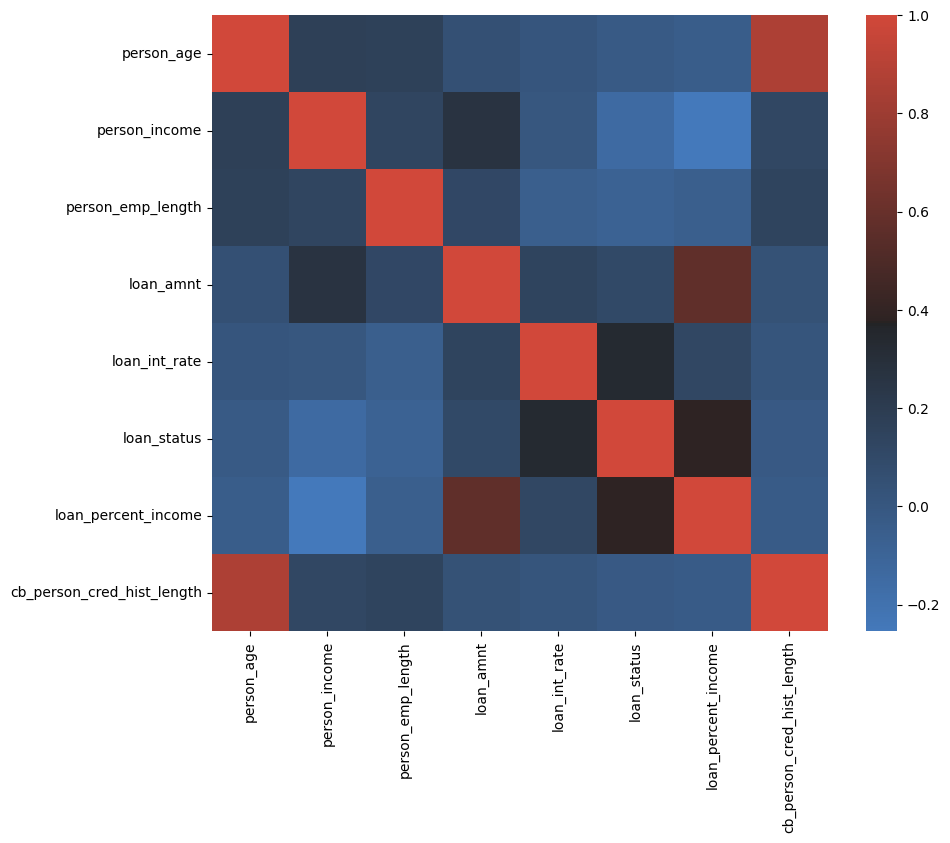

In [5]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype= bool), cmap=sns.diverging_palette(250, 15, as_cmap=True, center = "dark"),
            square=True, ax=ax)

print("loan percent income is more weight")

In [6]:
selected_features = ['person_age', 'person_emp_length']

for colname in selected_features:
    if df[colname].dtype == 'object':
        df[colname], _ = df[colname].factorize()

discrete_features = df.dtypes == int

#for colname in df.select_dtypes("object"):
#    df[colname], _ = df[colname].factorize()
#discrete_features = df.dtypes == int
#converting df objects ['person_age', 'person_emp_length'] into numericals
df #cell not required (check)

,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,PERSONAL,D,35000,16.02,1,0.59,3
1,21,9600,5.0,EDUCATION,B,1000,11.14,0,0.10,2
2,25,9600,1.0,MEDICAL,C,5500,12.87,1,0.57,3
3,23,65500,4.0,MEDICAL,C,35000,15.23,1,0.53,2
4,24,54400,8.0,MEDICAL,C,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,PERSONAL,C,5800,13.16,0,0.11,30
32577,54,120000,4.0,PERSONAL,A,17625,7.49,0,0.15,19
32578,65,76000,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,28
32579,56,150000,5.0,PERSONAL,B,15000,11.48,0,0.10,26


In [7]:
# if required do one hot encoder on df

In [8]:
# analyse loan status using graphs

In [9]:
#Variable Color harmony algorithm-based
from sklearn.feature_selection import SelectPercentile, chi2
selection = SelectPercentile(chi2, percentile= 80)

In [10]:
#another ML algo
'''model  = XGBClassifier(learning_rate = 0.05)
mypipeline = Pipeline(steps = [("preprocessor", preprocessor),
                               ("selection", selection),
                               ('model', model)
                              ]) '''

'model  = XGBClassifier(learning_rate = 0.05)\nmypipeline = Pipeline(steps = [("preprocessor", preprocessor),\n                               ("selection", selection),\n                               (\'model\', model)\n                              ]) '

In [11]:
variables = ['person_age','person_income','person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status']
credit_risk_corr = df[variables].corr()
credit_risk_corr
#loan_amount is always positive for all
# next loan int rate ---> more om loan status

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.042411,0.859133,-0.021629
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.254471,0.117987,-0.144449
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.054111,0.144699,-0.082489
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.572612,0.041967,0.105376
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.120314,0.016696,0.335133
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,1.000000,-0.031690,0.379366
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.031690,1.000000,-0.015529
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,0.379366,-0.015529,1.000000


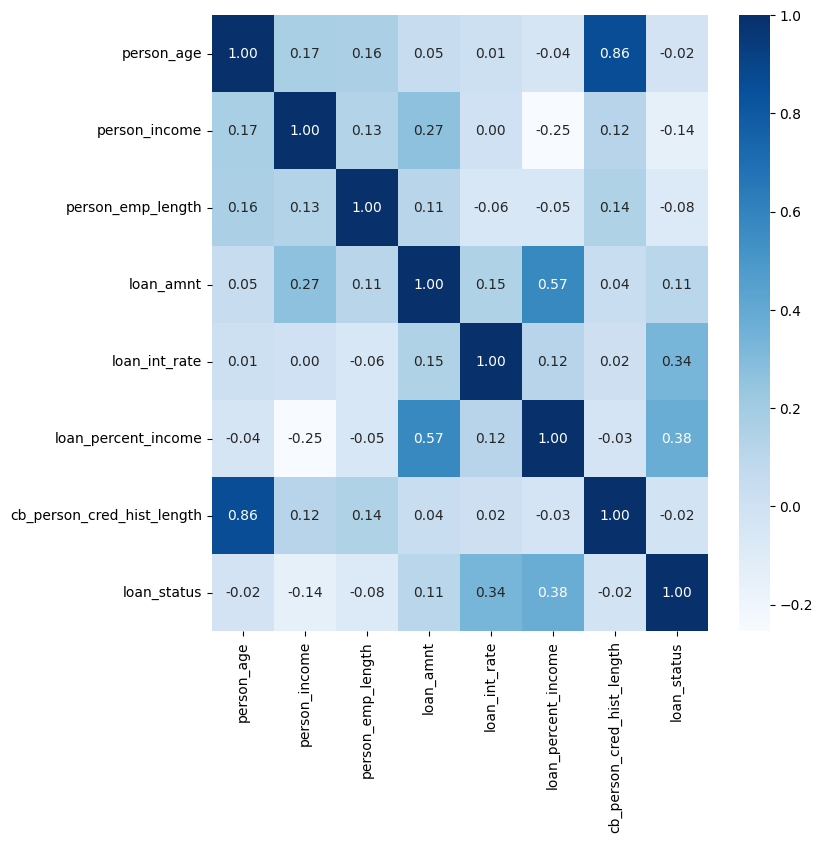

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(credit_risk_corr, cmap='Blues', annot=True, fmt='.2f')
plt.show()

In [13]:
#Dataset size
data_rows = df.shape[0]
data_colunms = df.shape[1]

print(f'This dataset have {data_rows} rows and {data_colunms} columns.')

This dataset have 32581 rows and 10 columns.


In [14]:
df.isnull().sum()

person_age                       0
person_income                    0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_cred_hist_length       0
dtype: int64

In [15]:
#remove na
mean_person_emp_length = df['person_emp_length'].mean()
mean_loan_int_rate = df['loan_int_rate'].mean()

df['person_emp_length'] = df['person_emp_length'].fillna(mean_person_emp_length) 
df['loan_int_rate'] = df['loan_int_rate'].fillna(mean_loan_int_rate) 

df.isna().sum()

person_age                    0
person_income                 0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_cred_hist_length    0
dtype: int64

In [16]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.085333,6322.086646,3.081605,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


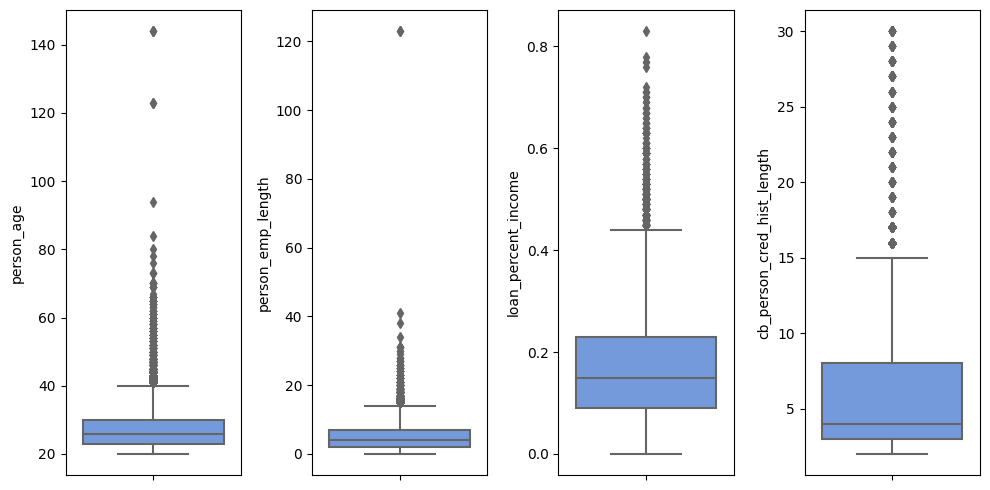

In [17]:
#box-plot
features = ['person_age','person_emp_length','loan_percent_income','cb_person_cred_hist_length']
plt.figure(figsize=(10,5))
for i in range(0,len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.    boxplot(y=df[features[i]], color='CornflowerBlue', orient='v')
    plt.tight_layout()

#try to remove outliers

In [18]:
variables = ['person_age','person_income','person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status']
credit_risk_corr = df[variables].corr()
credit_risk_corr

# after na obs: almost same (nochange)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
person_age,1.000000,0.173202,0.161159,0.050787,0.011873,-0.042411,0.859133,-0.021629
person_income,0.173202,1.000000,0.133360,0.266820,0.000752,-0.254471,0.117987,-0.144449
person_emp_length,0.161159,0.133360,1.000000,0.111768,-0.052839,-0.053120,0.142904,-0.080977
loan_amnt,0.050787,0.266820,0.111768,1.000000,0.139488,0.572612,0.041967,0.105376
loan_int_rate,0.011873,0.000752,-0.052839,0.139488,1.000000,0.114520,0.015788,0.319342
loan_percent_income,-0.042411,-0.254471,-0.053120,0.572612,0.114520,1.000000,-0.031690,0.379366
cb_person_cred_hist_length,0.859133,0.117987,0.142904,0.041967,0.015788,-0.031690,1.000000,-0.015529
loan_status,-0.021629,-0.144449,-0.080977,0.105376,0.319342,0.379366,-0.015529,1.000000


In [19]:
# Anaylsis and bar graphs





In [20]:
cols = ['loan_intent']
df = df.drop(cols, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_emp_length           32581 non-null  float64
 3   loan_grade                  32581 non-null  object 
 4   loan_amnt                   32581 non-null  int64  
 5   loan_int_rate               32581 non-null  float64
 6   loan_status                 32581 non-null  int64  
 7   loan_percent_income         32581 non-null  float64
 8   cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.2+ MB


In [21]:
#convert cat to ranking
def categorical_variables(df):
    object_cols = ['loan_grade']
    label_encoder = LabelEncoder()
    for col in object_cols:
        df[col] = label_encoder.fit_transform(df[col])
    return df
categorical_variables(df)
df

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,3,35000,16.02,1,0.59,3
1,21,9600,5.0,1,1000,11.14,0,0.10,2
2,25,9600,1.0,2,5500,12.87,1,0.57,3
3,23,65500,4.0,2,35000,15.23,1,0.53,2
4,24,54400,8.0,2,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,2,5800,13.16,0,0.11,30
32577,54,120000,4.0,0,17625,7.49,0,0.15,19
32578,65,76000,3.0,1,35000,10.99,1,0.46,28
32579,56,150000,5.0,1,15000,11.48,0,0.10,26


In [22]:
y = df['loan_status'].values
print(y)

x_df = df.drop('loan_status', axis=1)
x = x_df.values
print(x)

#used for logistic regession

[1 0 1 ... 1 0 0]
[[2.200e+01 5.900e+04 1.230e+02 ... 1.602e+01 5.900e-01 3.000e+00]
 [2.100e+01 9.600e+03 5.000e+00 ... 1.114e+01 1.000e-01 2.000e+00]
 [2.500e+01 9.600e+03 1.000e+00 ... 1.287e+01 5.700e-01 3.000e+00]
 ...
 [6.500e+01 7.600e+04 3.000e+00 ... 1.099e+01 4.600e-01 2.800e+01]
 [5.600e+01 1.500e+05 5.000e+00 ... 1.148e+01 1.000e-01 2.600e+01]
 [6.600e+01 4.200e+04 2.000e+00 ... 9.990e+00 1.500e-01 3.000e+01]]


In [23]:
from sklearn import model_selection,linear_model, metrics
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV, train_test_split
# Split Train and Test Sets
label = df['loan_status'] # labels
features = df.drop('loan_status',axis=1) # features
x_train, x_test, y_train, y_test = model_selection.train_test_split(features, label, 
                                                                    random_state=42, test_size=.30)
print('The train dataset has {} data\nThe test dataset has {} data'.
      format(x_train.shape[0], x_test.shape[0]))



The train dataset has 22806 data
The test dataset has 9775 data


In [24]:
scaler = MinMaxScaler().fit(x_train)
X_train_norm = scaler.transform(x_train)
X_test_norm = scaler.transform(x_test)

see=pd.DataFrame(X_train_norm)
print(see)

              0         1         2         3         4         5         6   
0      0.040323  0.010390  0.073171  0.000000  0.034783  0.078546  0.025641  \
1      0.016129  0.011841  0.048780  0.166667  0.710145  0.224502  0.423077   
2      0.088710  0.016911  0.016260  0.500000  0.688406  0.579719  0.256410   
3      0.120968  0.011841  0.040650  0.166667  0.130435  0.192263  0.089744   
4      0.129032  0.010173  0.048780  0.333333  0.661594  0.577374  0.461538   
...         ...       ...       ...       ...       ...       ...       ...   
22801  0.153226  0.005754  0.056911  0.333333  0.086957  0.501758  0.115385   
22802  0.040323  0.010841  0.040650  0.000000  0.231884  0.087925  0.153846   
22803  0.048387  0.024016  0.008130  0.666667  0.565217  0.736811  0.179487   
22804  0.048387  0.028519  0.000000  0.333333  0.420290  0.327766  0.115385   
22805  0.056452  0.010173  0.089431  0.000000  0.217391  0.121336  0.153846   

              7  
0      0.071429  
1      0.000000

In [25]:
from sklearn.model_selection import train_test_split
a=df.drop(['loan_status'],axis=1)
b = df['loan_status']
a.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_emp_length           32581 non-null  float64
 3   loan_grade                  32581 non-null  int32  
 4   loan_amnt                   32581 non-null  int64  
 5   loan_int_rate               32581 non-null  float64
 6   loan_percent_income         32581 non-null  float64
 7   cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int32(1), int64(4)
memory usage: 1.9 MB


In [26]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.3, random_state = 42)

print(a_train)
print(a_test)
print(b_train)
print(b_test)

       person_age  person_income  person_emp_length  loan_grade  loan_amnt   
12657          25          66300                9.0           0       1700  \
11611          22          75000                6.0           1      25000   
18223          31         105400                2.0           3      24250   
24772          35          75000                5.0           1       5000   
30770          36          65000                6.0           2      23325   
...           ...            ...                ...         ...        ...   
29802          39          38500                7.0           2       3500   
5390           25          69000                5.0           0       8500   
860            26         148000                1.0           4      20000   
15795          26         175000                0.0           2      15000   
23654          27          65000               11.0           0       8000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_

In [27]:

NN_model = Sequential() #train x_train working good
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train_norm.shape[1], activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy','mean_absolute_error'])

In [28]:
from tensorflow.keras.callbacks import History 
history = History()
History=NN_model.fit(X_train_norm, y_train, epochs=50, batch_size=500, validation_split = 0.2, callbacks=[history])

Epoch 1/50


37/37 [==============================] - 2s 16ms/step - loss: 0.2161 - accuracy: 0.7847 - mean_absolute_error: 0.2161 - val_loss: 0.2227 - val_accuracy: 0.7769 - val_mean_absolute_error: 0.2227
Epoch 2/50
37/37 [==============================] - 0s 10ms/step - loss: 0.2054 - accuracy: 0.7937 - mean_absolute_error: 0.2054 - val_loss: 0.1905 - val_accuracy: 0.8187 - val_mean_absolute_error: 0.1905
Epoch 3/50
37/37 [==============================] - 0s 9ms/step - loss: 0.1815 - accuracy: 0.8282 - mean_absolute_error: 0.1815 - val_loss: 0.1852 - val_accuracy: 0.8332 - val_mean_absolute_error: 0.1852
Epoch 4/50
37/37 [==============================] - 0s 11ms/step - loss: 0.1746 - accuracy: 0.8390 - mean_absolute_error: 0.1746 - val_loss: 0.1801 - val_accuracy: 0.8360 - val_mean_absolute_error: 0.1801
Epoch 5/50
37/37 [==============================] - 0s 11ms/step - loss: 0.1677 - accuracy: 0.8458 - mean_absolute_error: 0.1677 - val_loss: 0.1658 - val_accuracy: 0.8452 - val_me

In [29]:
input_data = {
    'person_age': [23,22,25,25,24,23],  
    'person_income': [115000,59000,162500,9600,83000,78000],  # 23	115000	2	    A	35000	7.9	    0	0.3		4  ] no
    'person_emp_length': [2,123,2,1,8,7],                 #22     59000   123     3   35000   16.02   1   0.59     3 outlier] yes 
    'loan_grade':[0,3,0,2,0,5],                           #25	    162500	2		A	35000	7.49	0	0.22		4] no
    'loan_amnt':[35000,35000,35000,5500,35000,30000],         #25	    9600	1		C	5500	12.87	1	0.57		3] yes 
    'loan_int_rate':[7.9,16.02,7.49,12.87,8.9,18.62],         #24	    83000	8		A	35000	8.9	    1	0.42		2] yes
    'loan_percent_income':[0.3,0.59,0.22,0.57,0.42,0.38],    #23	    78000	7		F	30000	18.62	1	0.38		3] yes
    'cb_person_cred_hist_length':[4,3,4,3,2,3]  
}
input_df = pd.DataFrame(input_data)
scaler = MinMaxScaler().fit(x_train)
check = scaler.transform(input_df)

predict = NN_model.predict(check)
#print(predict[4])
NN_model.summary()

1/1 [==============================] - 0s 108ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 166017 (648.50 KB)
Trainable params: 166017 (648.50 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________________

In [30]:
from sklearn.metrics import accuracy_score
import numpy as np
#print(type(y_test))
#y_test= y_test.to_numpy()
predictions = NN_model.predict(X_test_norm)
#print(predictions)
#print('type=',type(predictions))
converted_data = (predictions > 0.5).astype(int)
#print(converted_data)

precision = precision_score(y_test, converted_data)
recall = recall_score(y_test, converted_data)
f1 = f1_score(y_test, converted_data)
accuracy = accuracy_score(y_test,converted_data)

print(accuracy)
print(precision)
print(recall)
print(f1)

306/306 [==============================] - 1s 2ms/step
0.8605626598465473
0.7218212104386452
0.6012950971322849
0.6560686348725713


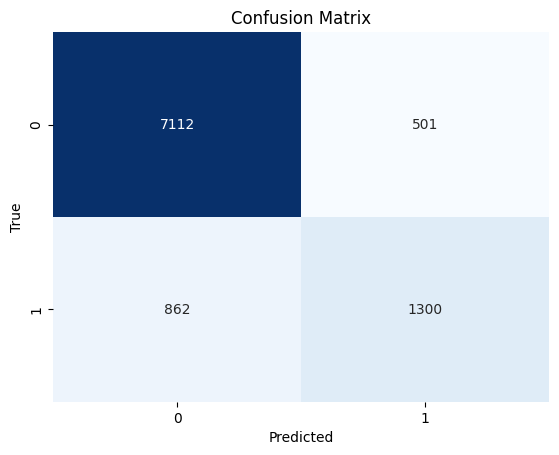

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
cm = confusion_matrix(y_test, converted_data)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()